# Converting ``storebranch.csv``
This is our final table to convert, and it's the simplest one, we only need to join
store's lat and lng location to the main table through store_branch_id, let's check it again!

Also, there's no missing data according to the pandas profile, so our process is very
straight-forward.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
stores = pd.read_csv('./data/storebranch.csv')
stores

,store_branch_id,store_id,lat,lng
0,aff1621254f7c1be92f64550478c56e6,92cc227532d17e56e07902b254dfad10,-33.422497,-70.609231
1,56352739f59643540a3a6e16985f62c7,0336dcbab05b9d5ad24f4333c7658a0e,-33.385484,-70.555579
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,9bf31c7ff062936a96d3c8bd1f8f2ff3,-33.416579,-70.565224
3,2b24d495052a8ce66358eb576b8912c8,c4ca4238a0b923820dcc509a6f75849b,-33.512578,-70.655952
4,5487315b1286f907165907aa8fc96619,d82c8d1619ad8176d665453cfb2e55f0,-33.347645,-70.542229
...,...,...,...,...
471,045117b0e0a11a242b9765e79cbf113f,a87ff679a2f3e71d9181a67b7542122c,-33.036111,-71.524149
472,2cfa3753d6a524711acb5fce38eeca1a,3f67fd97162d20e6fe27748b5b372509,-33.406081,-70.598128
473,7486cef2522ee03547cfb970a404a874,8f468c873a32bb0619eaeb2050ba45d1,-33.397498,-70.584666
474,c06d06da9666a219db15cf575aff2824,9a1158154dfa42caddbd0694a4e9bdc8,-33.390604,-70.547206


In [4]:
# check the number of unique values for store_branch_id and store_id
stores['store_branch_id'].value_counts()

aff1621254f7c1be92f64550478c56e6    1
b0bef4c9a6e50d43880191492d4fc827    1
9a4400501febb2a95e79248486a5f6d3    1
5129a5ddcd0dcd755232baa04c231698    1
f2e43fa3400d826df4195a9ac70dca62    1
                                   ..
ae1eaa32d10b6c886981755d579fb4d8    1
b9141aff1412dc76340b3822d9ea6c72    1
6c14da109e294d1e8155be8aa4b1ce8e    1
10a5ab2db37feedfdeaab192ead4ac0e    1
eb163727917cbba1eea208541a643e74    1
Name: store_branch_id, Length: 476, dtype: int64

In [5]:
stores['store_id'].value_counts()

c4ca4238a0b923820dcc509a6f75849b    33
9bf31c7ff062936a96d3c8bd1f8f2ff3    23
c0c7c76d30bd3dcaefc96f40275bdc0a    19
a87ff679a2f3e71d9181a67b7542122c    17
f899139df5e1059396431415e770c6dd    15
                                    ..
8d34201a5b85900908db6cae92723617     1
df0aab058ce179e4f7ab135ed4e641a9     1
30bb3825e8f631cc6075c0f87bb4978c     1
48aedb8880cab8c45637abc7493ecddd     1
8f468c873a32bb0619eaeb2050ba45d1     1
Name: store_id, Length: 221, dtype: int64

So store_id holds the branch name which is repeated on the data and store_branch_id is the
unique identifier to join, we will add a new field where we count the number of stores
a branch has, which could be related to how well the store performs time-wise.

In [11]:
# add the total count to the dataframe for each store branch
def add_branch_count(df):
    container = []  # stores the field values
    hashtable = dict()  # stores the count for each branch
    # first we count stores and add them to the dict with O(n) complexity
    for store in df['store_id']:
        if store in hashtable:  # we sum it up
            hashtable[store] += 1
        else:  # we need to initialize it
            hashtable[store] = 1
    # now we can use the hashtable to add the count to each field
    for store in df['store_id']:
        container.append(hashtable[store])
    df['branch_size'] = container

    return

In [12]:
# test the function
add_branch_count(stores)
stores

,store_branch_id,store_id,lat,lng,branch_size
0,aff1621254f7c1be92f64550478c56e6,92cc227532d17e56e07902b254dfad10,-33.422497,-70.609231,1
1,56352739f59643540a3a6e16985f62c7,0336dcbab05b9d5ad24f4333c7658a0e,-33.385484,-70.555579,3
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,9bf31c7ff062936a96d3c8bd1f8f2ff3,-33.416579,-70.565224,23
3,2b24d495052a8ce66358eb576b8912c8,c4ca4238a0b923820dcc509a6f75849b,-33.512578,-70.655952,33
4,5487315b1286f907165907aa8fc96619,d82c8d1619ad8176d665453cfb2e55f0,-33.347645,-70.542229,2
...,...,...,...,...,...
471,045117b0e0a11a242b9765e79cbf113f,a87ff679a2f3e71d9181a67b7542122c,-33.036111,-71.524149,17
472,2cfa3753d6a524711acb5fce38eeca1a,3f67fd97162d20e6fe27748b5b372509,-33.406081,-70.598128,1
473,7486cef2522ee03547cfb970a404a874,8f468c873a32bb0619eaeb2050ba45d1,-33.397498,-70.584666,1
474,c06d06da9666a219db15cf575aff2824,9a1158154dfa42caddbd0694a4e9bdc8,-33.390604,-70.547206,7


Now all we need to confirm is the extension of the stores, are we in a city or multiple cities?

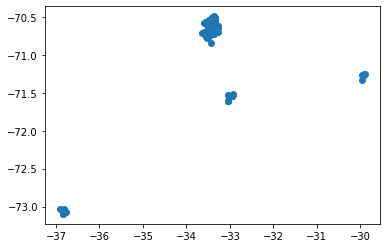

In [34]:
plt.scatter(stores['lat'], stores['lng'])
plt.show()

It seems obvious that we have 4 cities in the database (for example the biggest cluster is
definitely Santiago). We could also tag lat, lng as part of a cluster which could make more
sense for a model. For the model it won't matter if we tag a value as 'Santiago' or '1'.

Because we know there are four clusters we can use a k-means model directly.

In [28]:
# create a k-means cluster for lat, lng data
kmeans = KMeans(n_clusters=4, random_state=0).fit(stores[['lat', 'lng']])
kmeans

KMeans(n_clusters=4, random_state=0)

In [30]:
# test the model with an example
predictions = kmeans.predict(stores[['lat', 'lng']])
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1])

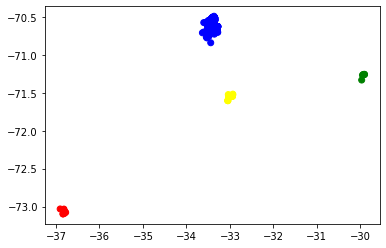

In [32]:
# ploy the clustered scatter
palette = ["blue","red","green","yellow"]
colors = [palette[i] for i in predictions]
plt.scatter(stores['lat'], stores['lng'], c=colors)
plt.show()

The cluster looks good, let's add it to the table

In [33]:
stores['city'] = predictions
stores

,store_branch_id,store_id,lat,lng,branch_size,city
0,aff1621254f7c1be92f64550478c56e6,92cc227532d17e56e07902b254dfad10,-33.422497,-70.609231,1,0
1,56352739f59643540a3a6e16985f62c7,0336dcbab05b9d5ad24f4333c7658a0e,-33.385484,-70.555579,3,0
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,9bf31c7ff062936a96d3c8bd1f8f2ff3,-33.416579,-70.565224,23,0
3,2b24d495052a8ce66358eb576b8912c8,c4ca4238a0b923820dcc509a6f75849b,-33.512578,-70.655952,33,0
4,5487315b1286f907165907aa8fc96619,d82c8d1619ad8176d665453cfb2e55f0,-33.347645,-70.542229,2,0
...,...,...,...,...,...,...
471,045117b0e0a11a242b9765e79cbf113f,a87ff679a2f3e71d9181a67b7542122c,-33.036111,-71.524149,17,3
472,2cfa3753d6a524711acb5fce38eeca1a,3f67fd97162d20e6fe27748b5b372509,-33.406081,-70.598128,1,0
473,7486cef2522ee03547cfb970a404a874,8f468c873a32bb0619eaeb2050ba45d1,-33.397498,-70.584666,1,0
474,c06d06da9666a219db15cf575aff2824,9a1158154dfa42caddbd0694a4e9bdc8,-33.390604,-70.547206,7,0


## Conclusions
Very straight-forward table, we add city cluster to help a model make decisions based on
city relations as cities could have different timings according to distances. Also branch size
of the store could be related on how fast a request can be filled. If this database needs tuning
in the future we can tokenize stores according to it's size but keeping them separate, as two
stores having the same branch size are different tokens.

Finally, let's save this table to be used in the final dataset.

In [38]:
# we won't be needing the store_id, it was transformed into branch_size
#stores.drop('store_id', axis=0, inplace=True)
stores

,store_branch_id,lat,lng,branch_size,city
0,aff1621254f7c1be92f64550478c56e6,-33.422497,-70.609231,1,0
1,56352739f59643540a3a6e16985f62c7,-33.385484,-70.555579,3,0
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,-33.416579,-70.565224,23,0
3,2b24d495052a8ce66358eb576b8912c8,-33.512578,-70.655952,33,0
4,5487315b1286f907165907aa8fc96619,-33.347645,-70.542229,2,0
...,...,...,...,...,...
471,045117b0e0a11a242b9765e79cbf113f,-33.036111,-71.524149,17,3
472,2cfa3753d6a524711acb5fce38eeca1a,-33.406081,-70.598128,1,0
473,7486cef2522ee03547cfb970a404a874,-33.397498,-70.584666,1,0
474,c06d06da9666a219db15cf575aff2824,-33.390604,-70.547206,7,0


In [39]:
stores.to_csv('./data/storebranch_processed.csv')